<a href="https://colab.research.google.com/github/pedrorock87/Projetos-de-Analise-de-Dados/blob/main/Analise_loja_cestaBasica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Perguntas Respondidas por essa analise:**


.

1.Ticket médio, minimo e maximo,Totais e médias de venda.
2. total venda geral.
1. Qual o Produto que mais Vende.
1. Qual Categoria de cesta mais vende (Natal ou Basica)
2. Qual a % de Desconto por Categoria.
2. Qual o cliente que mais compra.
1. Quantos fretes foram realizados por mês
2. Segmentação por Categoria:
1. Análise por Linha de Produtos
1. Classificação por Margem de Lucro(sem acesso a essa informação, Buscar com o especialista)


















# importando as bibliotecas!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importando a base de dados!

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/base dados vendas.xlsx')

In [ ]:
df

,CODIGO,DATA,CLIENTE,FORMA,CESTAS,DESC,V BÁSICA,V NATAL,TOTAL
0,2.0,2023-05-05,CONSUMIDOR,NaN,1.0,0.0,10.00,NaN,10.00
1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2023-04-19,CONSUMIDOR,NaN,1.0,0.0,10.00,NaN,10.00
3,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,2023-06-17,Cristiano Nunes Ribeiro,NaN,1.0,0.0,274.25,NaN,274.25
...,...,...,...,...,...,...,...,...,...
3016,1512.0,2023-12-01,49.260.695 MONIQUE CRISTINI RICARDO MARQUES,NaN,4.0,50.0,630.00,NaN,580.00
3017,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3018,1513.0,2023-12-30,NaN,NaN,NaN,0.0,NaN,NaN,0.00
3019,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Tratamento dos Dados**

In [ ]:
print(f'temos um total de {df.CODIGO.count()} Dados de Venda')

temos um total de 1511 Dados de Venda


In [ ]:
print(f'temos um total de {df.CLIENTE.count()}')

temos um total de 1502


In [ ]:
print(f'temos um total de {df.FORMA.count()} Dados de forma de pagamento')

temos um total de 0 Dados de forma de pagamento


**Alteração de colunas.**

In [ ]:
df=df.rename(columns={'V BÁSICA':'V_BASICA','V NATAL':'V_NATAL'})

In [ ]:
print(f'temos um total de vendas de {df.V_BASICA.count()} ')

temos um total de vendas de 1398 


In [ ]:
print(f'temos um total de vendas de cesta de natal {df.V_NATAL.count()} ')

temos um total de vendas de cesta de natal 124 


 **Verificando Dados nulos**

In [ ]:
df.CLIENTE.isnull().sum()

1519

In [ ]:
df.CODIGO.isnull().sum()

1510

In [ ]:
df.DATA.isnull().sum()

1510

In [ ]:
df.FORMA.isnull().sum()

3021

In [ ]:
df.CESTAS.isnull().sum()

1519

In [ ]:
df.DESC.isnull().sum()

1510

In [ ]:
df.TOTAL.isnull().sum()

1511

*Deletar as colunas onde todos os dados pertecentes a ela sejam nulos.*

**transformando os dados zerados em nulo.**

In [ ]:
df=df.dropna(how='all',axis=1)

In [ ]:
df

,CODIGO,DATA,CLIENTE,CESTAS,DESC,V_BASICA,V_NATAL,TOTAL
0,2.0,2023-05-05,CONSUMIDOR,1.0,0.0,10.00,NaN,10.00
1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2023-04-19,CONSUMIDOR,1.0,0.0,10.00,NaN,10.00
3,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,2023-06-17,Cristiano Nunes Ribeiro,1.0,0.0,274.25,NaN,274.25
...,...,...,...,...,...,...,...,...
3016,1512.0,2023-12-01,49.260.695 MONIQUE CRISTINI RICARDO MARQUES,4.0,50.0,630.00,NaN,580.00
3017,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3018,1513.0,2023-12-30,NaN,NaN,0.0,NaN,NaN,0.00
3019,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


*Deletar as LINHAS onde todos os dados pertecentes a ela sejam nulos.*

In [ ]:
df=df.dropna(how='all',axis=0)

In [ ]:
df

,CODIGO,DATA,CLIENTE,CESTAS,DESC,V_BASICA,V_NATAL,TOTAL
0,2.0,2023-05-05,CONSUMIDOR,1.0,0.0,10.00,NaN,10.00
2,3.0,2023-04-19,CONSUMIDOR,1.0,0.0,10.00,NaN,10.00
4,4.0,2023-06-17,Cristiano Nunes Ribeiro,1.0,0.0,274.25,NaN,274.25
6,5.0,2023-04-20,TAUBATÉ MIL GRAU,2.0,0.0,339.45,NaN,339.45
8,6.0,2023-04-20,CONSUMIDOR,1.0,0.0,15.00,NaN,15.00
...,...,...,...,...,...,...,...,...
3012,1510.0,2023-12-30,CONSUMIDOR,1.0,0.0,15.00,NaN,15.00
3014,1511.0,2023-12-30,CONSUMIDOR,1.0,0.0,15.00,NaN,15.00
3016,1512.0,2023-12-01,49.260.695 MONIQUE CRISTINI RICARDO MARQUES,4.0,50.0,630.00,NaN,580.00
3018,1513.0,2023-12-30,NaN,NaN,0.0,NaN,NaN,0.00


**Excluindo linhas com valores nulos e zerados ao mesmo tempo, onde não temos nenhum tipo de registro.**

In [ ]:
coluna_vazia=df.loc[df.CODIGO==1513.0]
df.drop(3018)

,CODIGO,DATA,CLIENTE,CESTAS,DESC,V_BASICA,V_NATAL,TOTAL
0,2.0,2023-05-05,CONSUMIDOR,1.0,0.0,10.00,NaN,10.00
2,3.0,2023-04-19,CONSUMIDOR,1.0,0.0,10.00,NaN,10.00
4,4.0,2023-06-17,Cristiano Nunes Ribeiro,1.0,0.0,274.25,NaN,274.25
6,5.0,2023-04-20,TAUBATÉ MIL GRAU,2.0,0.0,339.45,NaN,339.45
8,6.0,2023-04-20,CONSUMIDOR,1.0,0.0,15.00,NaN,15.00
...,...,...,...,...,...,...,...,...
3010,1509.0,2023-12-29,CONSUMIDOR,1.0,0.0,10.00,NaN,10.00
3012,1510.0,2023-12-30,CONSUMIDOR,1.0,0.0,15.00,NaN,15.00
3014,1511.0,2023-12-30,CONSUMIDOR,1.0,0.0,15.00,NaN,15.00
3016,1512.0,2023-12-01,49.260.695 MONIQUE CRISTINI RICARDO MARQUES,4.0,50.0,630.00,NaN,580.00


**Excluindo linhas onde o total é igual a zero**

In [ ]:
df[df.TOTAL==0]

,CODIGO,DATA,CLIENTE,CESTAS,DESC,V_BASICA,V_NATAL,TOTAL
342,173.0,2023-06-20,VANESSA DENISE MONTEIRO MENESES,NaN,0.0,NaN,NaN,0.0
418,211.0,2023-06-26,CONSUMIDOR,1.0,0.0,0.0,NaN,0.0
2862,1435.0,2023-12-22,NaN,NaN,0.0,NaN,NaN,0.0
2876,1442.0,2023-12-22,NaN,NaN,0.0,NaN,NaN,0.0
2932,1470.0,2023-12-26,NaN,NaN,0.0,NaN,NaN,0.0
2938,1473.0,2023-12-26,NaN,NaN,0.0,NaN,NaN,0.0
2942,1475.0,2023-12-27,NaN,NaN,0.0,NaN,NaN,0.0
3004,1506.0,2023-12-30,NaN,NaN,0.0,NaN,NaN,0.0
3018,1513.0,2023-12-30,NaN,NaN,0.0,NaN,NaN,0.0


In [ ]:
df=df.drop(342)
df=df.drop(418)

**Agora criamos um novo data frame onde o total é diferente de zero.**

In [ ]:
df = df[df['TOTAL'] != 0]

In [ ]:
df

,CODIGO,DATA,CLIENTE,CESTAS,DESC,V_BASICA,V_NATAL,TOTAL
0,2.0,2023-05-05,CONSUMIDOR,1.0,0.0,10.00,NaN,10.00
2,3.0,2023-04-19,CONSUMIDOR,1.0,0.0,10.00,NaN,10.00
4,4.0,2023-06-17,Cristiano Nunes Ribeiro,1.0,0.0,274.25,NaN,274.25
6,5.0,2023-04-20,TAUBATÉ MIL GRAU,2.0,0.0,339.45,NaN,339.45
8,6.0,2023-04-20,CONSUMIDOR,1.0,0.0,15.00,NaN,15.00
...,...,...,...,...,...,...,...,...
3010,1509.0,2023-12-29,CONSUMIDOR,1.0,0.0,10.00,NaN,10.00
3012,1510.0,2023-12-30,CONSUMIDOR,1.0,0.0,15.00,NaN,15.00
3014,1511.0,2023-12-30,CONSUMIDOR,1.0,0.0,15.00,NaN,15.00
3016,1512.0,2023-12-01,49.260.695 MONIQUE CRISTINI RICARDO MARQUES,4.0,50.0,630.00,NaN,580.00


In [ ]:
df.count()

CODIGO      1502
DATA        1502
CLIENTE     1500
CESTAS      1501
DESC        1502
V_BASICA    1397
V_NATAL      124
TOTAL       1501
dtype: int64

# **1 - Ticket médio, minimo e maximo,Totais e médias de venda.**

**Total venda de cestas Natal.**

In [ ]:
V_NATAL=df.V_NATAL.sum()

In [ ]:
V_natal = "{:.2f}".format(V_NATAL)

**Total venda de cestas Basicas.**

In [ ]:
V_BASICA=df.V_BASICA.sum()

In [ ]:
V_basica ="{:.2f}".format(V_BASICA)

**Total Desconto.**




In [ ]:
TOTAL_DESCONTO=df.DESC.sum()

In [ ]:
Total_Desc ="{:.2f}".format(TOTAL_DESCONTO)


**Criação de datetime!**

In [ ]:
df_mes=df['DATA'] = pd.to_datetime(df['DATA'])

In [ ]:
df['Mês'] = df['DATA'].dt.month
resultado_mes = df.groupby('Mês').sum()

<ipython-input-167-69d59f2c250a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resultado_mes = df.groupby('Mês').sum()


 **Total e Média de desconto Aplicado por Mês!**

In [ ]:
Media_desconto=round(resultado_mes.DESC.mean(), 2)

In [ ]:
print(f'O valor médio de desconto aplicado por mês é de {Media_desconto} R$')

O valor médio de desconto aplicado por mês é de 1264.52 R$


**Total transações!**

In [ ]:
total_transação=df.TOTAL.count()

In [ ]:
print(f'o total de transações realizadas é de {total_transação}')

o total de transações realizadas é de 1501


**Ticket**

Ticket Médio

In [ ]:

TicketMedio=df.TOTAL.mean()

In [ ]:
TicketMedio = "{:.2f}".format(TicketMedio)

Ticket Minimo

In [ ]:
df.TOTAL.min()

10.0

Ticket Maximo

In [ ]:
df.TOTAL.max()

12124.52

#**2 - Analise por Cliente.**


In [ ]:
df.head(5)

,CODIGO,DATA,CLIENTE,CESTAS,DESC,V_BASICA,V_NATAL,TOTAL,Mês
0,2.0,2023-05-05,CONSUMIDOR,1.0,0.0,10.00,NaN,10.00,5
2,3.0,2023-04-19,CONSUMIDOR,1.0,0.0,10.00,NaN,10.00,4
4,4.0,2023-06-17,Cristiano Nunes Ribeiro,1.0,0.0,274.25,NaN,274.25,6
6,5.0,2023-04-20,TAUBATÉ MIL GRAU,2.0,0.0,339.45,NaN,339.45,4
8,6.0,2023-04-20,CONSUMIDOR,1.0,0.0,15.00,NaN,15.00,4


**QTD de Clientes e Quantidade Média de Compra por cliente!**

In [ ]:
qtd_clientes=df['CLIENTE'].nunique()

In [ ]:
clientes=df.groupby('CLIENTE').sum()

<ipython-input-178-298ac6cd76d1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clientes=df.groupby('CLIENTE').sum()


In [ ]:
clientes

,CODIGO,CESTAS,DESC,V_BASICA,V_NATAL,TOTAL,Mês
CLIENTE,,,,,,,
CARLOS ROBERTO LUIS DE SOUZA,5535.0,12.0,8.70,0.00,673.5,664.80,48
GISELLY GOIS,637.0,1.0,0.00,10.00,0.0,10.00,9
Glaedson,2564.0,17.0,63.50,1065.50,0.0,1002.00,24
Jessyca Marques,3598.0,6.0,22.75,368.15,56.7,402.10,34
MARCELO CASSIO DE PAULO,1459.0,1.0,0.00,182.99,0.0,182.99,12
...,...,...,...,...,...,...,...
WELLINGTON AUGUSTO RODRIGUES,608.0,1.0,40.80,203.99,0.0,163.19,9
Wellington Jean Honorato assunç?o,144.0,1.0,23.10,231.00,0.0,207.90,6
ZULEIKA,2142.0,2.0,5.90,179.80,0.0,173.90,22


In [ ]:
qtd_venda_cestas_basica_media=df.CESTAS.mean()

In [ ]:
qtd_venda_cestas_basica_media

1.8394403730846103

In [ ]:
qtd_venda_cestas_basica_media_formatado = "{:.2f}".format(qtd_venda_cestas_basica_media)

**Natal:**

In [ ]:
total_transação_compra_cliente_Natal=df.V_NATAL.sum()

In [ ]:
desconto_venda_natal=df.groupby('V_NATAL')['DESC'].sum().reset_index()

In [ ]:
desconto_venda_natal=desconto_venda_natal.DESC.sum()

In [ ]:
total_transação_compra_cliente_Natal_formatado=total_transação_compra_cliente_Natal-desconto_venda_natal

In [ ]:
total_transação_compra_cliente_Natal_formatado="{:.2f}".format(total_transação_compra_cliente_Natal_formatado)

**QTD Compra Cesta de Natal por Cliente**

In [ ]:
QTD_venda_natal=df.groupby('V_NATAL')['CESTAS'].sum().reset_index()

In [ ]:
QTD_total_Natal=QTD_venda_natal.CESTAS.sum()

In [ ]:
QTD_total_Natal

789.0

***QTD Compra Cesta Básica por Cliente ***

In [ ]:
desconto_venda=df.groupby('V_BASICA')['DESC'].sum().reset_index()

In [ ]:
desconto_total_venda=desconto_venda.DESC.sum()

In [ ]:
desconto_total_venda_formatado="{:.2f}".format(desconto_total_venda)

In [ ]:
total_compra_cliente_Basica=df.V_BASICA.sum()

In [ ]:
total_compra_cliente_Basica_formatado="{:.2f}".format(total_compra_cliente_Basica)

QTD Cesta Basica

In [ ]:
QTD_venda=df.groupby('V_BASICA')['CESTAS'].sum().reset_index()

In [ ]:
QTD_total_cestas_basica=QTD_venda.CESTAS.sum()

In [ ]:
QTD_total_cestas_basica

2056.0

**Segmentação por Cliente:**
   - Analise como diferentes segmentos de clientes respondem a diferentes produtos.
   - Exemplos: Produtos preferidos por clientes corporativos, Produtos preferidos por consumidores individuais, etc.

# **3-Analise tecnica por produtos!**

In [ ]:
df_2=pd.read_excel('/content/drive/MyDrive/dados gerais.xls')

In [ ]:
df_2.head(5)

,PRODUTO,CESTAS,QTD,TOTAL,DATA
0,1,ESSENCIAL 01 - 2023,6,353.40,2023-06-01
1,2,ESSENCIAL 02 - 2023,5,383.75,2023-06-01
2,3,ESSENCIAL 03 - 2023,4,364.00,2023-06-01
3,4,ESSENCIAL 04 - 2023,5,604.50,2023-06-01
4,6,ESSENCIAL 06 - 2023,1,157.50,2023-06-01


**Agrupamento por mês**

**`Média valor Vendido por cestas!`**

In [294]:
df_2['Mês'] = pd.to_datetime(df_2['DATA'])

# Criar uma nova coluna 'Mês' extraindo o mês da coluna 'Data'
df_2['Mês'] = df_2['DATA'].dt.month_name()

# Calcular a média de vendas por mês
media_por_mes_valor = df_2.groupby(['Mês','CESTAS'])['TOTAL'].mean().reset_index()

# Renomear as colunas para maior clareza
media_por_mes_valor.columns = ['Mês','CESTAS', 'Média de Vendas']

# Exibir o resultado
print(media_por_mes_valor)

           Mês                           CESTAS  Média de Vendas
0        April              ESSENCIAL 05 - 2023           145.30
1        April              ESSENCIAL 10 - 2023           274.25
2        April         ESSENCIAL COZINHA - 2023            76.40
3        April      ESSENCIAL LAVANDERIA - 2023            65.20
4        April                      FRETE PAP 1           500.00
..         ...                              ...              ...
188  September                      FRETE PAP 4            25.00
189  September       SINDICATO CONSTRUÇÃO CIVIL           183.20
190  September          SINDICATO DO TRANSPORTE           193.50
191  September            SINDICATO METALURGICO           232.00
192  September  SINDICATO POSTOS DE COMBUSTIVEL           730.50

[193 rows x 3 columns]


**Média QTD Vendido por cestas!**

In [295]:
media_por_mes_qtd = df_2.groupby(['Mês','CESTAS'])['QTD'].mean().reset_index()
media_por_mes_qtd.columns = ['Mês','CESTAS', 'Média de Vendas']
media_por_mes_qtd

,Mês,CESTAS,Média de Vendas
0,April,ESSENCIAL 05 - 2023,1.0
1,April,ESSENCIAL 10 - 2023,1.0
2,April,ESSENCIAL COZINHA - 2023,2.0
3,April,ESSENCIAL LAVANDERIA - 2023,1.0
4,April,FRETE PAP 1,50.0
...,...,...,...
188,September,FRETE PAP 4,1.0
189,September,SINDICATO CONSTRUÇÃO CIVIL,1.0
190,September,SINDICATO DO TRANSPORTE,1.0
191,September,SINDICATO METALURGICO,1.0


1. **Segmentação por Tipo:**

In [ ]:
tipos_de_cestas_valor=df_2[['PRODUTO','CESTAS','TOTAL']].groupby(['CESTAS']).sum().TOTAL.sort_values(ascending=False)

In [ ]:
tipos_de_cestas_total_agrupado=df_2.groupby('CESTAS')['TOTAL'].sum().reset_index()

In [ ]:
tipos_de_cestas_qtd=df_2[['CESTAS','QTD']].groupby(['CESTAS']).sum().QTD.sort_values(ascending=False)

In [ ]:
tipos_de_cestas_qtd_agrupado=df_2.groupby('CESTAS')['QTD'].sum().reset_index()

<ipython-input-205-9fd2fd97dd69>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='CESTAS', y='TOTAL', data=tipos_de_cestas_total_agrupado, palette='viridis')


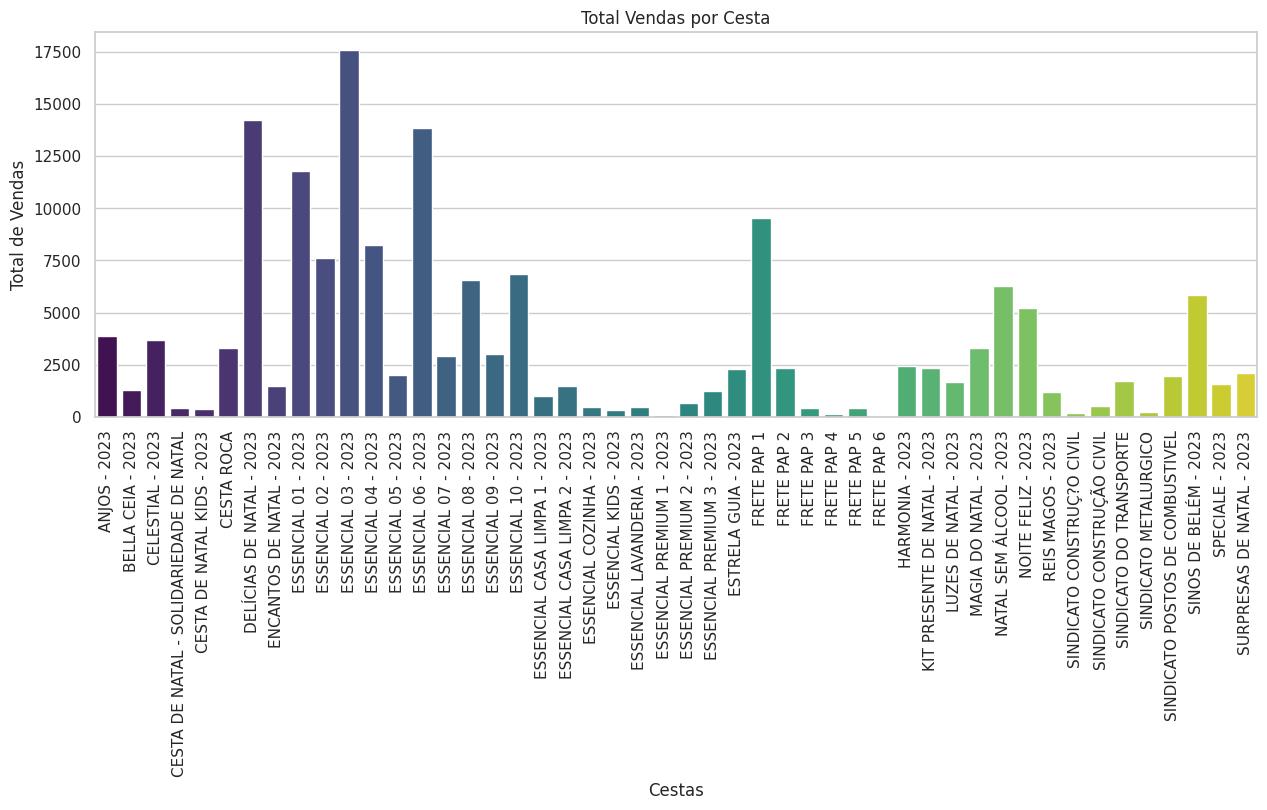

In [ ]:
grafico_valor=plt.figure(figsize=(15, 5))
bar_plot = sns.barplot(x='CESTAS', y='TOTAL', data=tipos_de_cestas_total_agrupado, palette='viridis')

plt.xlabel('Cestas')
plt.ylabel('Total de Vendas')
plt.title('Total Vendas por Cesta')
plt.xticks(rotation=90)
plt.show()

In [ ]:
tipos_de_cestas_qtd

CESTAS
FRETE PAP 1                                955
ESSENCIAL 01 - 2023                        200
ESSENCIAL 03 - 2023                        193
DELÍCIAS DE NATAL - 2023                   185
FRETE PAP 2                                158
ESSENCIAL 02 - 2023                         99
ESSENCIAL 06 - 2023                         88
ANJOS - 2023                                78
ESSENCIAL 04 - 2023                         68
SINOS DE BELÉM - 2023                       61
NATAL SEM ÁLCOOL - 2023                     60
CESTA ROCA                                  58
HARMONIA - 2023                             50
NOITE FELIZ - 2023                          46
ESTRELA GUIA - 2023                         40
ESSENCIAL 08 - 2023                         32
KIT PRESENTE DE NATAL - 2023                30
ESSENCIAL CASA LIMPA 1 - 2023               30
SURPRESAS DE NATAL - 2023                   30
CELESTIAL - 2023                            30
ESSENCIAL 10 - 2023                         25
MAGIA 

In [ ]:
sns.set(style="whitegrid")


<ipython-input-208-328fd4dfebc2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='CESTAS', y='QTD', data=tipos_de_cestas_qtd_agrupado, palette='viridis')


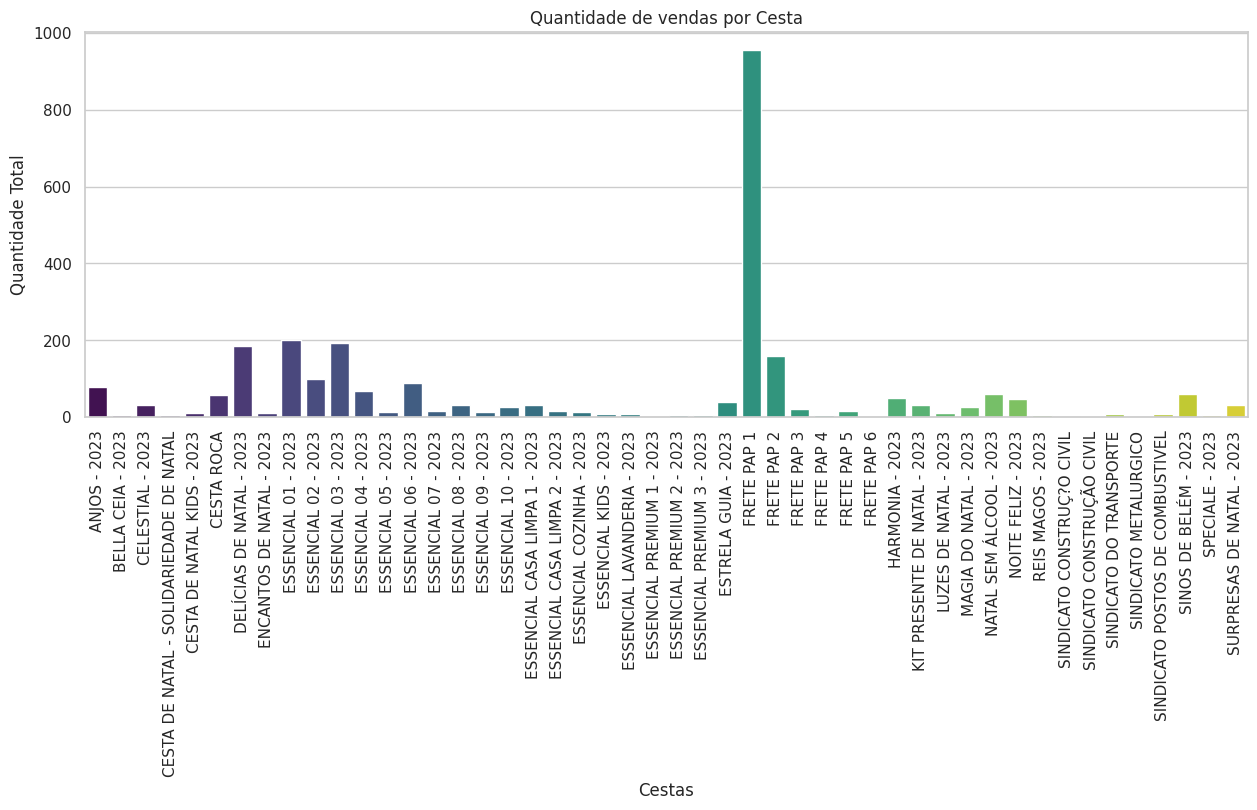

In [ ]:
grafico_qtd=plt.figure(figsize=(15, 5))
bar_plot = sns.barplot(x='CESTAS', y='QTD', data=tipos_de_cestas_qtd_agrupado, palette='viridis')
plt.xlabel('Cestas')
plt.ylabel('Quantidade Total')
plt.title('Quantidade de vendas por Cesta')
plt.xticks(rotation=90)
plt.show()

**Total Valor Venda Cesta.**

**Segmentação por categoria**

In [ ]:
df_sind_premium_kids=df_2[(df_2['PRODUTO'] >=15) & (df_2['PRODUTO'] < 23)].sum()

<ipython-input-209-9b55ab0833b8>:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sind_premium_kids=df_2[(df_2['PRODUTO'] >=15) & (df_2['PRODUTO'] < 23)].sum()


In [ ]:
df_sind_premium_kids = df_sind_premium_kids.to_frame().T

In [ ]:
df_sind_premium_kids=df_sind_premium_kids.drop('CESTAS',axis=1)

In [ ]:
df_sind_premium_kids=df_sind_premium_kids.drop('PRODUTO',axis=1)

**Cesta Básica Comum**



------------------------------------------------------------------------------------------







In [ ]:
df_Alimentação=df_2[(df_2['PRODUTO'] < 11)].sum()

<ipython-input-213-40c1341da805>:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_Alimentação=df_2[(df_2['PRODUTO'] < 11)].sum()


In [ ]:
df_Alimentação

PRODUTO                                                  399
CESTAS     ESSENCIAL 01 - 2023ESSENCIAL 02 - 2023ESSENCIA...
QTD                                                      748
TOTAL                                               80426.14
dtype: object

In [ ]:
df_Alimentação = df_Alimentação.to_frame().T

In [ ]:
df_Alimentação=df_Alimentação.drop('CESTAS',axis=1)

In [ ]:
df_Alimentação=df_Alimentação.drop('PRODUTO',axis=1)

In [ ]:
df_Basica_Alimentação=df_Alimentação

**Cesta Básica Limpeza**

In [ ]:
df_2.head(5)

,PRODUTO,CESTAS,QTD,TOTAL,DATA
0,1,ESSENCIAL 01 - 2023,6,353.40,2023-06-01
1,2,ESSENCIAL 02 - 2023,5,383.75,2023-06-01
2,3,ESSENCIAL 03 - 2023,4,364.00,2023-06-01
3,4,ESSENCIAL 04 - 2023,5,604.50,2023-06-01
4,6,ESSENCIAL 06 - 2023,1,157.50,2023-06-01


In [ ]:
df_Limpeza=df_2[(df_2['PRODUTO'] >10) & (df_2['PRODUTO'] < 15)].sum()

<ipython-input-220-d0fc94b6d323>:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_Limpeza=df_2[(df_2['PRODUTO'] >10) & (df_2['PRODUTO'] < 15)].sum()


In [ ]:
df_Limpeza = df_Limpeza.to_frame().T

In [ ]:
df_Limpeza=df_Limpeza.drop('PRODUTO',axis=1)

In [ ]:
df_Limpeza=df_Limpeza.drop('CESTAS',axis=1)

In [ ]:
df_Limpeza

,QTD,TOTAL
0,64,3359.8


**Frete**

In [ ]:
df_frete=df_2[(df_2['PRODUTO'] >=23) & (df_2['PRODUTO'] <=28)].sum()

<ipython-input-225-f66a4e10cd44>:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_frete=df_2[(df_2['PRODUTO'] >=23) & (df_2['PRODUTO'] <=28)].sum()


In [ ]:
df_frete=df_frete.to_frame().T

In [ ]:
df_frete=df_frete.drop('PRODUTO',axis=1)

In [ ]:
df_frete=df_frete.drop('CESTAS',axis=1)

**Cesta Básica Natal**

In [ ]:
df_2.head(5)

,PRODUTO,CESTAS,QTD,TOTAL,DATA
0,1,ESSENCIAL 01 - 2023,6,353.40,2023-06-01
1,2,ESSENCIAL 02 - 2023,5,383.75,2023-06-01
2,3,ESSENCIAL 03 - 2023,4,364.00,2023-06-01
3,4,ESSENCIAL 04 - 2023,5,604.50,2023-06-01
4,6,ESSENCIAL 06 - 2023,1,157.50,2023-06-01


In [ ]:
df_Natal=df_2[(df_2['PRODUTO'] >28) & (df_2['PRODUTO'] < 48)].sum()

<ipython-input-230-421aafaea5e8>:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_Natal=df_2[(df_2['PRODUTO'] >28) & (df_2['PRODUTO'] < 48)].sum()


In [ ]:
df_Natal = df_Natal.to_frame().T

In [ ]:
df_Natal=df_Natal.drop('PRODUTO',axis=1)

In [ ]:
df_Natal=df_Natal.drop('CESTAS', axis=1)

In [ ]:
df_Natal

,QTD,TOTAL
0,743,62914.95


**2-Análise por Linha de Produtos:**

Tabela com linhas e colunas agrupadas de acordo com as categorias de cestas.
essa nova tabela foi necessario criar uma nova coluna para armazenar os nomes dos grupos por linha.


**Nova Tabela com as Categorias!**

In [ ]:
grupos = [df_Basica_Alimentação, df_sind_premium_kids, df_Natal,df_Limpeza,df_frete]


In [ ]:
df_agrupado = pd.concat([df.groupby(['QTD', 'TOTAL']).sum() for df in grupos]).reset_index()

In [ ]:
nomes=['Basica_Alimentação','sind_premium_kids','Natal','Limpeza','Frete']

In [ ]:
df_agrupado['CESTAS']=nomes

In [ ]:
df_agrupado

,QTD,TOTAL,CESTAS
0,748,80426.14,Basica_Alimentação
1,40,6962.54,sind_premium_kids
2,743,62914.95,Natal
3,64,3359.80,Limpeza
4,1156,12960.00,Frete


**Sindicato , premium e kids**

# **Resumo geral de Vendas!**


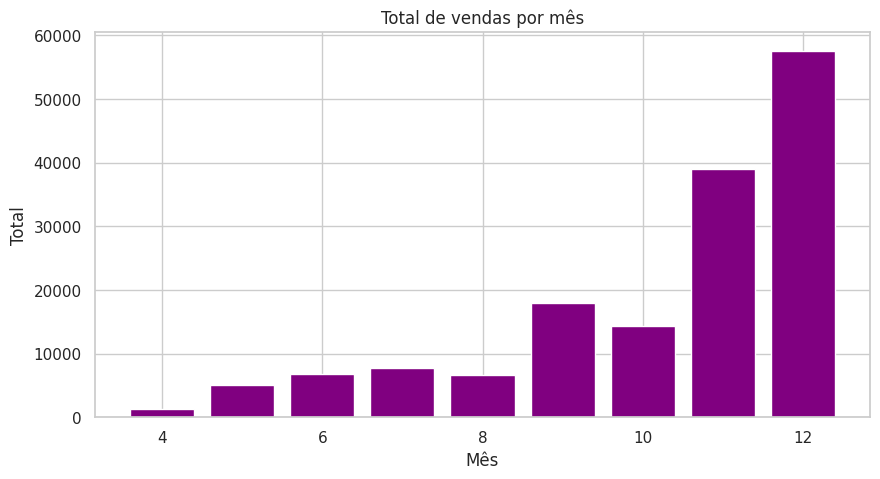

In [ ]:
cores='purple'
plt.figure(figsize=(10,5))
plt.bar(resultado_mes.index, resultado_mes['TOTAL'], color=cores)
plt.xlabel('Mês')
plt.ylabel('Total')
plt.title('Total de vendas por mês')
plt.show()

In [ ]:
df

,CODIGO,DATA,CLIENTE,CESTAS,DESC,V_BASICA,V_NATAL,TOTAL,Mês
0,2.0,2023-05-05,CONSUMIDOR,1.0,0.0,10.00,NaN,10.00,5
2,3.0,2023-04-19,CONSUMIDOR,1.0,0.0,10.00,NaN,10.00,4
4,4.0,2023-06-17,Cristiano Nunes Ribeiro,1.0,0.0,274.25,NaN,274.25,6
6,5.0,2023-04-20,TAUBATÉ MIL GRAU,2.0,0.0,339.45,NaN,339.45,4
8,6.0,2023-04-20,CONSUMIDOR,1.0,0.0,15.00,NaN,15.00,4
...,...,...,...,...,...,...,...,...,...
3010,1509.0,2023-12-29,CONSUMIDOR,1.0,0.0,10.00,NaN,10.00,12
3012,1510.0,2023-12-30,CONSUMIDOR,1.0,0.0,15.00,NaN,15.00,12
3014,1511.0,2023-12-30,CONSUMIDOR,1.0,0.0,15.00,NaN,15.00,12
3016,1512.0,2023-12-01,49.260.695 MONIQUE CRISTINI RICARDO MARQUES,4.0,50.0,630.00,NaN,580.00,12


In [ ]:
Total_VENDA = round(df['TOTAL'].sum(), 2)

In [ ]:
TOTAL_DESCONTO = round(df['DESC'].sum(), 2)

In [ ]:
print(f'O valor total de vendido foi {Total_VENDA} R$ Com Desconto aplicado')

O valor total de vendido foi 156382.39 R$ Com Desconto aplicado


In [ ]:
print(f'O valor total Desconto aplicado foi {TOTAL_DESCONTO} R$')

O valor total Desconto aplicado foi 11380.69 R$


Total Básica

In [ ]:
V_basica

'104751.28'

Total Natal

In [ ]:
V_natal

'62822.05'

#  **Resumo da Analise Por Cliente!**

**Total Clientes**

In [ ]:
print(f'A quantidade total de clientes é de {qtd_clientes} e cada cliente compra uma média de {qtd_venda_cestas_basica_media_formatado} cestas,e nosso ticket médio é de {TicketMedio}R$')

A quantidade total de clientes é de 210 e cada cliente compra uma média de 1.84 cestas,e nosso ticket médio é de 104.19R$


**Total venda Básica Com Desconto aplicado**

In [ ]:
print(f'Valor Total de compra de cesta Básica é de {total_compra_cliente_Basica_formatado}R$ e quantidade {QTD_total_cestas_basica}')

Valor Total de compra de cesta Básica é de 104751.28R$ e quantidade 2056.0


In [ ]:
print(f'Total de Desconto aplicado para cestas Básicas é de {desconto_total_venda_formatado}R$ ')

Total de Desconto aplicado para cestas Básicas é de 7523.86R$ 


**Total Venda Natal Com Desconto Aplicado**

In [ ]:
print(f'Valor Total de compras de cestas de NATAL é de {total_transação_compra_cliente_Natal_formatado}R$ e quantidade {QTD_total_Natal} ')

Valor Total de compras de cestas de NATAL é de 58839.02R$ e quantidade 789.0 


In [ ]:
print(f'Total de Desconto aplicado para cestas de Natal é de {desconto_venda_natal}')

Total de Desconto aplicado para cestas de Natal é de 3983.03


# **Resumo Analise vendas por cestas!**

**Quantidade e valor de cesta de Básica comum.**


In [ ]:
df_Basica_Alimentação

,QTD,TOTAL
0,748,80426.14


**Quantidade e valor de cestas do Sindicato , premium e kids.**

In [ ]:
df_sind_premium_kids

,QTD,TOTAL
0,40,6962.54


**Quantidade e valor de cesta de Básica Limpeza.**


In [ ]:
df_Limpeza

,QTD,TOTAL
0,64,3359.8


**Quantidade e Total de Frete.**

In [ ]:
df_frete

,QTD,TOTAL
0,1156,12960.0


**Quantidade e valor de cesta de Natal.**

In [ ]:
df_Natal

,QTD,TOTAL
0,743,62914.95


**Totalizando uma Quantidade de  Cestas e um valor de Faturamento de 166.623,43 R$ .**

**Grafico de Categorias!**

Análise por Linha de Produtos:


In [ ]:
df_agrupado

,QTD,TOTAL,CESTAS
0,748,80426.14,Basica_Alimentação
1,40,6962.54,sind_premium_kids
2,743,62914.95,Natal
3,64,3359.80,Limpeza
4,1156,12960.00,Frete


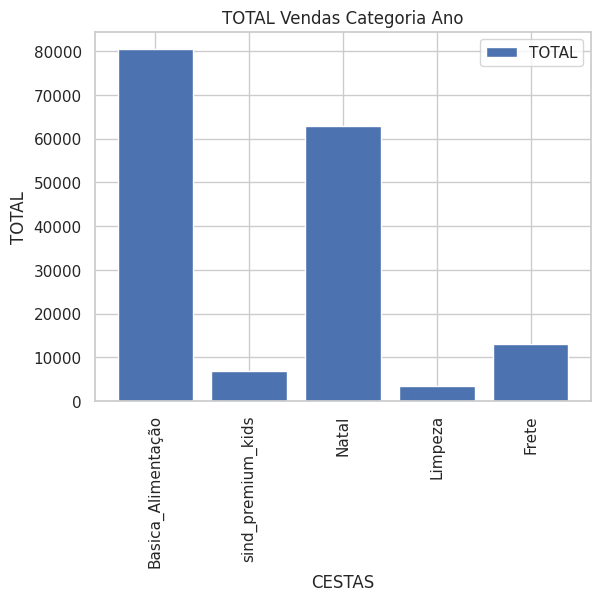

In [ ]:
plt.bar(df_agrupado['CESTAS'], df_agrupado['TOTAL'], label='TOTAL')

plt.xlabel('CESTAS')
plt.ylabel('TOTAL')
plt.title('TOTAL Vendas Categoria Ano')
plt.legend()
plt.xticks(rotation=90)
plt.show()

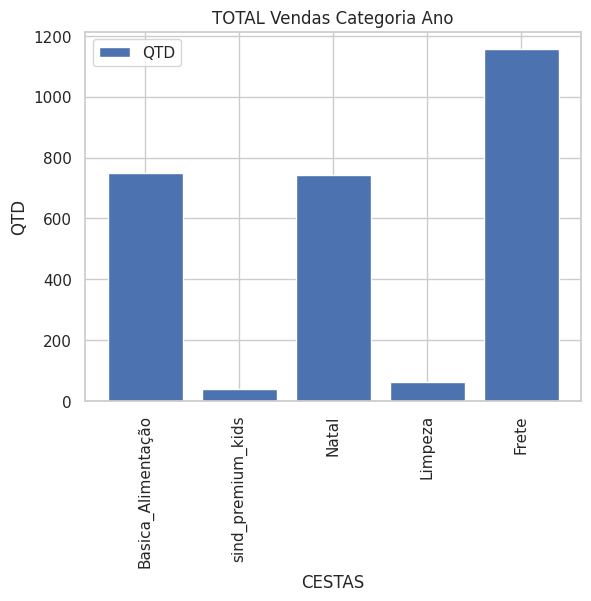

In [ ]:
plt.bar(df_agrupado['CESTAS'], df_agrupado['QTD'], label='QTD')

plt.xlabel('CESTAS')
plt.ylabel('QTD')
plt.title('TOTAL Vendas Categoria Ano')
plt.legend()
plt.xticks(rotation=90)
plt.show()

**Resumo analise por produtos:**
   - Divida os produtos em categorias amplas com base em características comuns, como tipo, finalidade ou função.
   - Exemplos: Alimentação, Premium e Sindicato, Limpeza, Alimentos, etc.

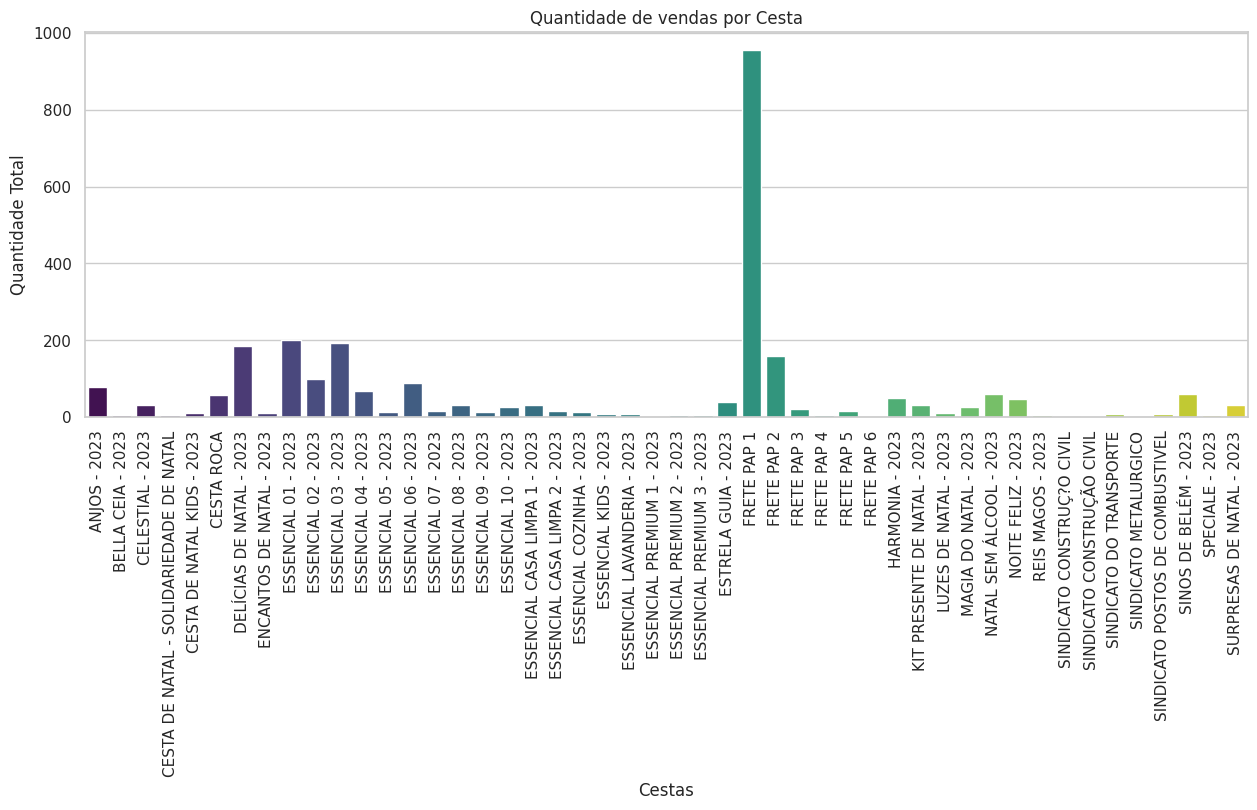

In [ ]:
grafico_qtd

In [ ]:
tipos_de_cestas_valor

CESTAS
ESSENCIAL 03 - 2023                        17563.00
DELÍCIAS DE NATAL - 2023                   14245.00
ESSENCIAL 06 - 2023                        13860.00
ESSENCIAL 01 - 2023                        11780.00
FRETE PAP 1                                 9540.00
ESSENCIAL 04 - 2023                         8221.20
ESSENCIAL 02 - 2023                         7598.25
ESSENCIAL 10 - 2023                         6856.25
ESSENCIAL 08 - 2023                         6582.40
NATAL SEM ÁLCOOL - 2023                     6270.00
SINOS DE BELÉM - 2023                       5862.10
NOITE FELIZ - 2023                          5225.60
ANJOS - 2023                                3884.40
CELESTIAL - 2023                            3678.00
MAGIA DO NATAL - 2023                       3327.50
CESTA ROCA                                  3288.60
ESSENCIAL 09 - 2023                         3003.00
ESSENCIAL 07 - 2023                         2927.84
HARMONIA - 2023                             2420.00
FRETE

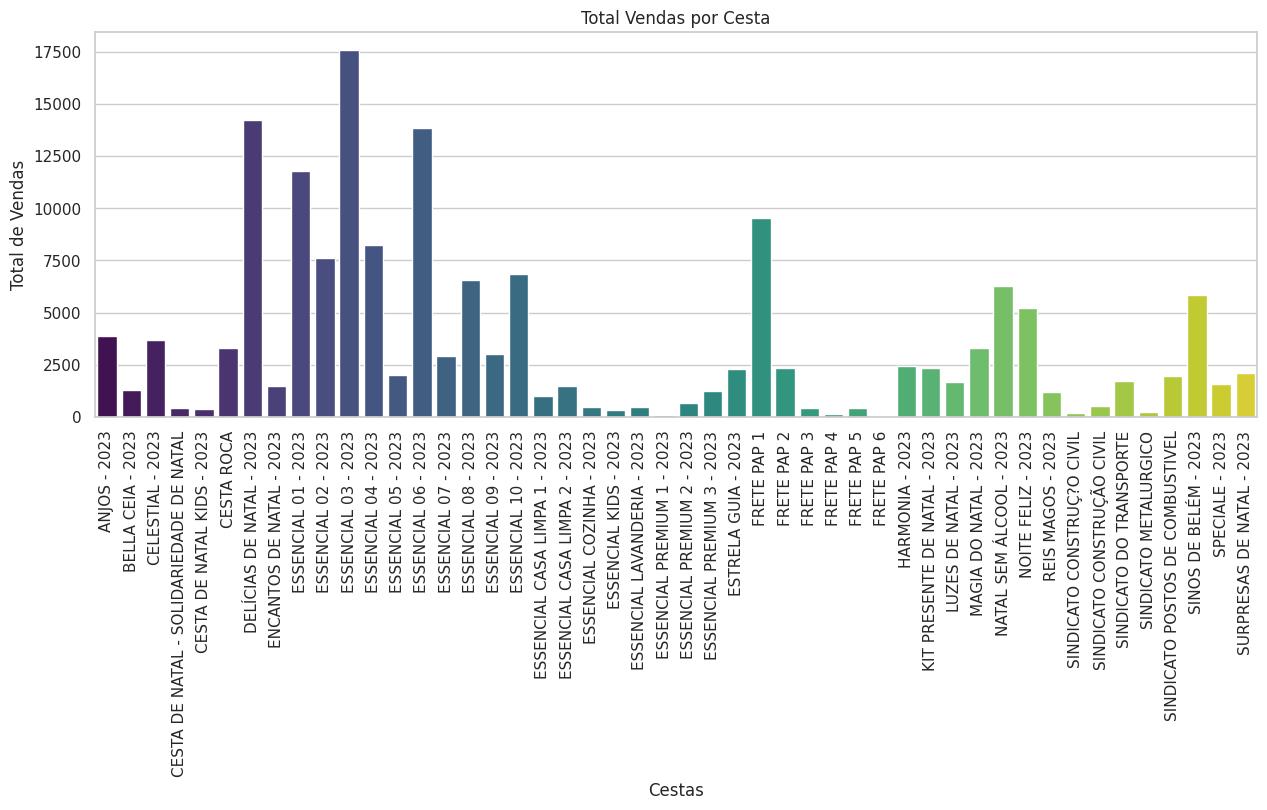

In [ ]:
grafico_valor

Total Quantidade por Cestas.

In [ ]:
tipos_de_cestas_qtd

CESTAS
FRETE PAP 1                                955
ESSENCIAL 01 - 2023                        200
ESSENCIAL 03 - 2023                        193
DELÍCIAS DE NATAL - 2023                   185
FRETE PAP 2                                158
ESSENCIAL 02 - 2023                         99
ESSENCIAL 06 - 2023                         88
ANJOS - 2023                                78
ESSENCIAL 04 - 2023                         68
SINOS DE BELÉM - 2023                       61
NATAL SEM ÁLCOOL - 2023                     60
CESTA ROCA                                  58
HARMONIA - 2023                             50
NOITE FELIZ - 2023                          46
ESTRELA GUIA - 2023                         40
ESSENCIAL 08 - 2023                         32
KIT PRESENTE DE NATAL - 2023                30
ESSENCIAL CASA LIMPA 1 - 2023               30
SURPRESAS DE NATAL - 2023                   30
CELESTIAL - 2023                            30
ESSENCIAL 10 - 2023                         25
MAGIA 

**Média de venda por Periodo!**

In [296]:
media_por_mes_qtd

,Mês,CESTAS,Média de Vendas
0,April,ESSENCIAL 05 - 2023,1.0
1,April,ESSENCIAL 10 - 2023,1.0
2,April,ESSENCIAL COZINHA - 2023,2.0
3,April,ESSENCIAL LAVANDERIA - 2023,1.0
4,April,FRETE PAP 1,50.0
...,...,...,...
188,September,FRETE PAP 4,1.0
189,September,SINDICATO CONSTRUÇÃO CIVIL,1.0
190,September,SINDICATO DO TRANSPORTE,1.0
191,September,SINDICATO METALURGICO,1.0


In [297]:
media_por_mes_valor

,Mês,CESTAS,Média de Vendas
0,April,ESSENCIAL 05 - 2023,145.30
1,April,ESSENCIAL 10 - 2023,274.25
2,April,ESSENCIAL COZINHA - 2023,76.40
3,April,ESSENCIAL LAVANDERIA - 2023,65.20
4,April,FRETE PAP 1,500.00
...,...,...,...
188,September,FRETE PAP 4,25.00
189,September,SINDICATO CONSTRUÇÃO CIVIL,183.20
190,September,SINDICATO DO TRANSPORTE,193.50
191,September,SINDICATO METALURGICO,232.00
